In [1]:
## Path for modules

import cartopy

import xarray as xr
import sys

import numpy as np
sys.path.insert(0,"/home/alberta/notebooks/git/xscale")
import xscale
import xscale.spectral.fft as xfft
from matplotlib.colors import LogNorm
import matplotlib.pylab as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sys.path.insert(0,"/home/alberta/notebooks/git/stage-Erika")
import Wavenum_freq_spec_func as wfs


In [3]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=4,dashboard_address=':8686')
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:45919' processes=4 threads=4, memory=201.35 GB>

## Dataset
### Format netcdf

In [4]:
data_dirT0 = '/bettik/alberta/eNATL60ACO-BLBT02-UV10m/'


In [5]:
ufileT0=data_dirT0+'eNATL60ACO-BLBT02_y2009m*.1h_vozocrtx10m.nc' # JAS
vfileT0=data_dirT0+'eNATL60ACO-BLBT02_y2009m*.1h_vomecrty10m.nc' # JAS


In [6]:
dsuT0=xr.open_mfdataset(ufileT0,combine='by_coords',parallel=True,chunks={'x':200,'y':200})
dsvT0=xr.open_mfdataset(vfileT0,combine='by_coords',parallel=True,chunks={'x':200,'y':200})


In [7]:
uT0=dsuT0.vozocrtx
vT0=dsvT0.vomecrty 


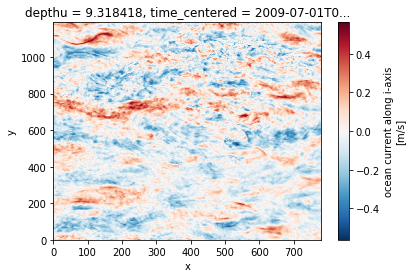

In [10]:
uT0[0].plot()

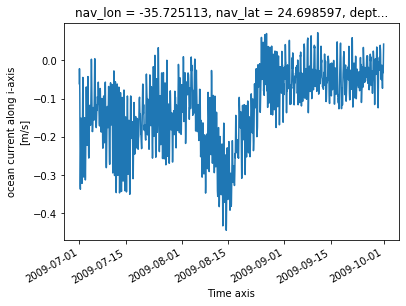

In [11]:
uT0[:,0,100,100].plot()

CPU times: user 2min 36s, sys: 6.13 s, total: 2min 42s
Wall time: 14min 16s


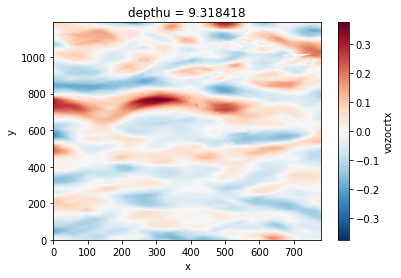

In [12]:
%time uT0.mean(dim='time_counter').plot()

CPU times: user 53 s, sys: 3.31 s, total: 56.3 s
Wall time: 9min 59s


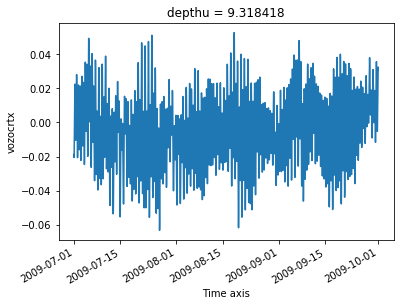

In [13]:
%time uT0.mean(dim='x').mean(dim='y').plot()